In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/obesity dataset -7.csv")
data.head()

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Consumption of water,Calories consumption monitoring,Physical activity frequency,SMOKE,Consumption of alcohol,Transportation used,Obesity level deducted
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,2.0,no,0.0,no,no,Public_Transportation,no
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,3.0,yes,3.0,yes,Sometimes,Public_Transportation,no
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,2.0,no,2.0,no,Frequently,Public_Transportation,no
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,2.0,no,2.0,no,Frequently,Walking,yes
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,2.0,no,0.0,no,Sometimes,Public_Transportation,yes


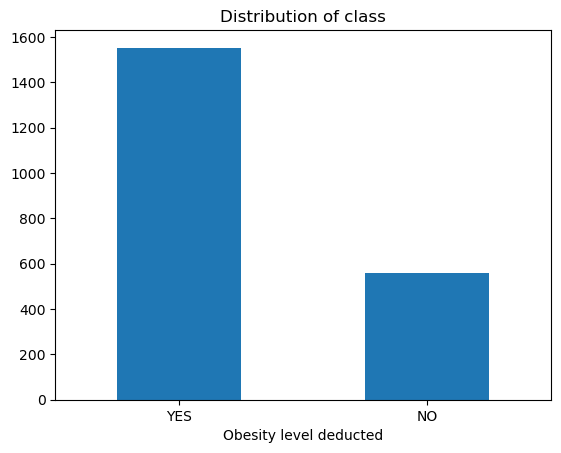

In [2]:
data['Obesity level deducted'].value_counts().plot.bar(rot = 0)
plt.xticks(range(2), ['YES', 'NO'])
plt.title('Distribution of class')
plt.show()

Label Encoding

In [3]:
cols = [i for i in data.columns if i not in data.select_dtypes(include='number').columns]
encoder = LabelEncoder()
for col in cols:
    data[col] = encoder.fit_transform(data[col])
data.head()

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Consumption of water,Calories consumption monitoring,Physical activity frequency,SMOKE,Consumption of alcohol,Transportation used,Obesity level deducted
0,0,21,1.62,64.0,1,0,2.0,3.0,2,2.0,0,0.0,0,3,3,0
1,0,21,1.52,56.0,1,0,3.0,3.0,2,3.0,1,3.0,1,2,3,0
2,1,23,1.80,77.0,1,0,2.0,3.0,2,2.0,0,2.0,0,1,3,0
3,1,27,1.80,87.0,0,0,3.0,3.0,2,2.0,0,2.0,0,1,4,1
4,1,22,1.78,89.8,0,0,2.0,1.0,2,2.0,0,0.0,0,2,3,1


Heatmap showing correlation betmween variables

<Axes: >

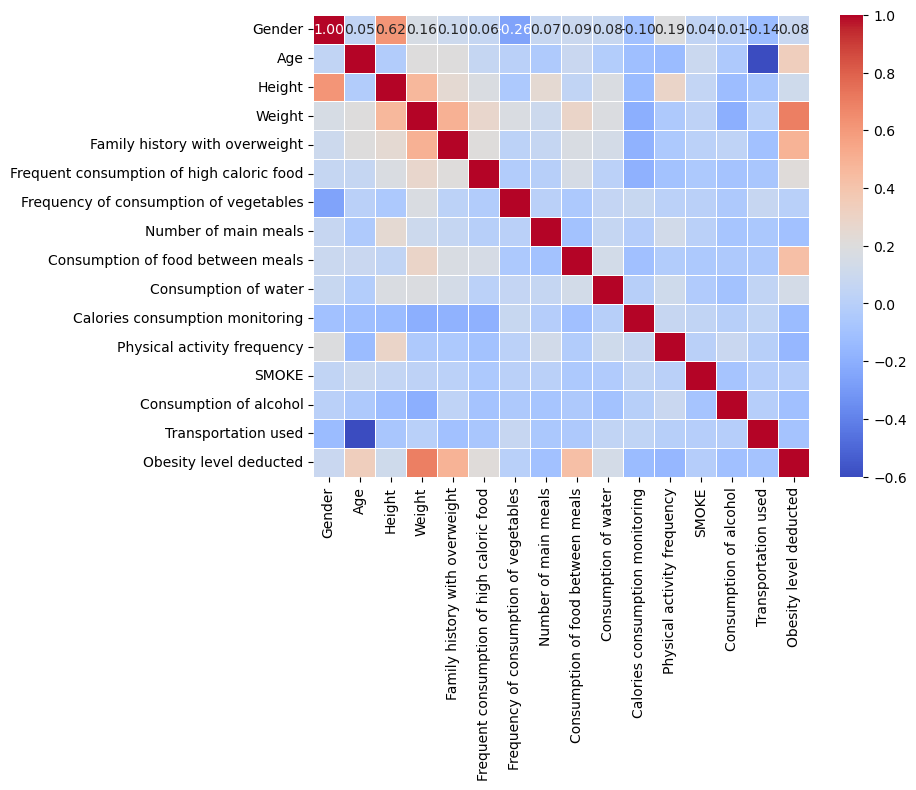

In [4]:
corr = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot = True, cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

Splitting Data 

In [5]:
X_features = data.iloc[:,0:15]
y_label = data.iloc[:,15]

Balancing Class

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X, y = rus.fit_resample(X_features, y_label)

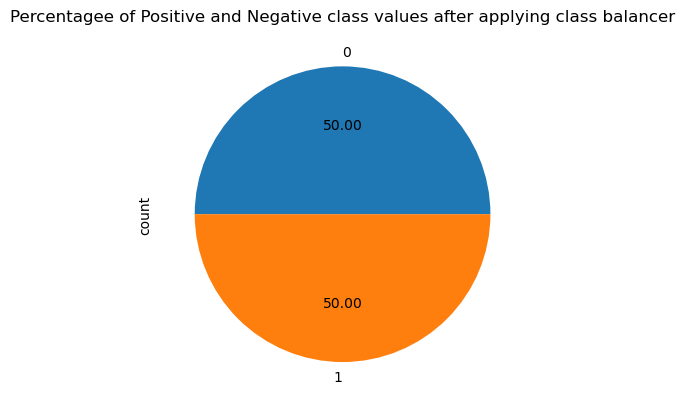

In [7]:
y.value_counts().plot.pie(autopct = '%.2f')
plt.title('Percentagee of Positive and Negative class values after applying class balancer')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Size of train set: ',X_train.shape)
print('Size of test set: ',X_test.shape)

Size of train set:  (894, 15)
Size of test set:  (224, 15)


#### Applying algorithms

In [9]:
test_acc = []
train_acc = []
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth = i)
    
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    
    train_accuracy = accuracy_score(y_train,y_pred)
    train_acc.append(train_accuracy)

    p_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,p_pred)
    test_acc.append(test_accuracy)

    print(f'>> {i} Train: {train_accuracy:>3f}--- Test: {test_accuracy:>3f}')

>> 1 Train: 0.897092--- Test: 0.937500
>> 2 Train: 0.897092--- Test: 0.937500
>> 3 Train: 0.951902--- Test: 0.959821
>> 4 Train: 0.963087--- Test: 0.977679
>> 5 Train: 0.987696--- Test: 0.973214
>> 6 Train: 0.997763--- Test: 0.982143
>> 7 Train: 0.998881--- Test: 0.977679
>> 8 Train: 1.000000--- Test: 0.977679
>> 9 Train: 1.000000--- Test: 0.977679
>> 10 Train: 1.000000--- Test: 0.968750
>> 11 Train: 1.000000--- Test: 0.959821
>> 12 Train: 1.000000--- Test: 0.964286
>> 13 Train: 1.000000--- Test: 0.973214
>> 14 Train: 1.000000--- Test: 0.973214
>> 15 Train: 1.000000--- Test: 0.964286
>> 16 Train: 1.000000--- Test: 0.973214
>> 17 Train: 1.000000--- Test: 0.973214
>> 18 Train: 1.000000--- Test: 0.959821
>> 19 Train: 1.000000--- Test: 0.968750
>> 20 Train: 1.000000--- Test: 0.973214


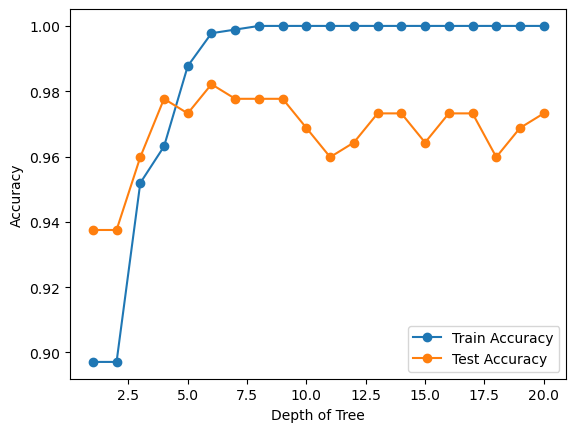

In [10]:
pyplot.plot(list(range(1,21)),train_acc,'-o',label = 'Train Accuracy')
pyplot.plot(list(range(1,21)),test_acc,'-o',label = 'Test Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

In [11]:
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2,5, 10,15, 20],
    'min_samples_split': [2, 5, 10]
}

In [12]:
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [13]:
print('Best estimators')
grid_search.best_estimator_

Best estimators


DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [14]:
print(f'Training accuracy:  {accuracy_score(y_train,grid_search.best_estimator_.predict(X_train)):.2%}')
print(f'Test accuracy: {accuracy_score(y_test,grid_search.best_estimator_.predict(X_test)):.2%}')

Training accuracy:  100.00%
Test accuracy: 96.88%


In [16]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=15)
    
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
    
train_accuracy = accuracy_score(y_train,y_pred)
print('Train accuracy: ',round(train_accuracy*100,2))

p_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test,p_pred)
print('Train accuracy: ',round(test_accuracy*100,2))

Train accuracy:  100.0
Train accuracy:  97.32


Prediction for new Data

In [17]:
X_features.sample(5)

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Consumption of water,Calories consumption monitoring,Physical activity frequency,SMOKE,Consumption of alcohol,Transportation used
918,0,22,1.730199,78.997062,1,1,2.0,1.0,2,2.0,0,1.0,0,2,3
985,1,23,1.650000,80.000000,1,1,2.0,3.0,2,2.0,0,0.0,0,3,3
1996,0,21,1.739950,135.693381,1,1,3.0,3.0,2,2.0,0,1.0,0,2,3
926,0,21,1.758372,79.469513,1,1,3.0,1.0,2,3.0,0,3.0,0,2,3
2061,0,26,1.623938,109.984263,1,1,3.0,3.0,2,2.0,0,0.0,0,2,3


In [18]:
new_data = np.array([[1, 20, 1.5, 50, 1, 1, 2.0, 2.0, 2, 1.0, 0, 1.0, 0, 2, 3]])
new_df = pd.DataFrame(new_data, columns = X_features.columns)
y_pred = clf.predict(new_df)
if y_pred[0]:
    print('Prediction: Obesity risk is high.')
else:
    print('Prediction: No obesity risk detected.')

Prediction: No obesity risk detected.
